# <b>Assignment : DT</b>

<font color='red'><b> Please check below video before attempting this assignment</b></font>

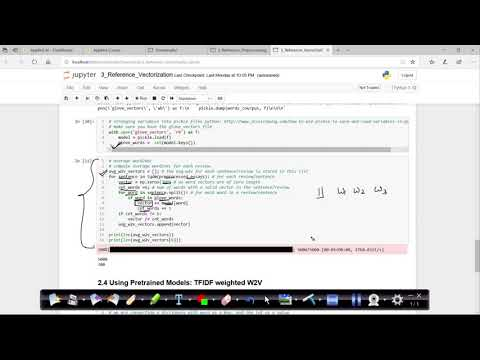

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZhLXULFjIjQ', width="1000",height="500")

<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [109]:
pip install chart_studio

In [110]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os

from chart_studio.plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [111]:
#please use below code to load glove vectors 
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

or else , you can use below code

In [ ]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/*course*/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<font color='blue'><b>Hint for calculating Sentiment scores</b></font>

In [112]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [113]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

<h1>1. Decision Tree </h1>

## 1.1 Loading Data

In [114]:
import pandas
data = pandas.read_csv('preprocessed_data.csv',nrows=50000)
data.head(5)

school_state  ...   price
0           ca  ...  725.05
1           ut  ...  213.03
2           ca  ...  329.00
3           ga  ...  481.04
4           wa  ...   17.74

[5 rows x 9 columns]

# Finding Sentiment Score of Preprocessed Essay

In [115]:
SID = SentimentIntensityAnalyzer()

In [116]:
negitive = []
positive = []
neutral = []
compound = []
for i in tqdm(data['essay']):
    j = SID.polarity_scores(i)['neg']
    k = SID.polarity_scores(i)['neu']
    l = SID.polarity_scores(i)['pos']
    
    negitive.append(j)
    positive.append(k)
    neutral.append(l)
    

100%|██████████| 50000/50000 [05:40<00:00, 146.91it/s]


In [118]:
data['negitive'] = negitive
data['positive'] = positive
data['neutral'] = neutral
data.head(2)

school_state teacher_prefix  ... positive  neutral
0           ca            mrs  ...    0.783    0.205
1           ut             ms  ...    0.680    0.248

[2 rows x 12 columns]

In [119]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

school_state teacher_prefix  ... positive  neutral
0           ca            mrs  ...    0.783    0.205

[1 rows x 11 columns]

# Splitting data into Train and cross validation(or test): Stratified Sampling

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

# TFIDF VECTORIZER FOR ESSAY

In [121]:
preprocessed_essays = data['essay'].values

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (50000, 12122)


# Make Data Model Ready: encoding eassay

In [123]:
tfid_vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
tfid_vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfid = tfid_vectorizer.transform(X_train['essay'].values)
X_cv_essay_tfid = tfid_vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfid = tfid_vectorizer.transform(X_test['essay'].values)


print(X_train_essay_tfid.shape, y_train.shape)
print(X_cv_essay_tfid.shape, y_cv.shape)
print(X_test_essay_tfid.shape, y_test.shape)


(22445, 5000) (22445,)
(11055, 5000) (11055,)
(16500, 5000) (16500,)


# TFIDF W2V VECTORIZER

In [124]:

tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [125]:
# average Word2Vec
# compute average word2vec for each review.
def w2v(preprocessed_essays):
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    return tfidf_w2v_vectors


In [126]:
X_train_essay_w2v =  w2v(X_train['essay'].values)
X_test_essay_w2v =  w2v(X_test['essay'].values)
X_cv_essay_w2v =  w2v(X_cv['essay'].values)


100%|██████████| 11055/11055 [00:25<00:00, 434.94it/s]


# Make Data Model Ready: encoding numerical, categorical features

## Encoding categorical features: Teacher prefix

In [127]:
vectorizer_teacher = CountVectorizer()
vectorizer_teacher.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer_teacher.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer_teacher.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer_teacher.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer_teacher.get_feature_names())
print("="*100)

After vectorizations
(22445, 5) (22445,)
(11055, 5) (11055,)
(16500, 5) (16500,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


## Encoding categorical features: Project grade category

In [128]:
vectorizer_grade = CountVectorizer()
vectorizer_grade.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer_grade.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer_grade.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer_grade.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer_grade.get_feature_names())
print("="*100)

After vectorizations
(22445, 4) (22445,)
(11055, 4) (11055,)
(16500, 4) (16500,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


## Encoding categorical features: School State

In [129]:
vectorizer_state = CountVectorizer()
vectorizer_state.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer_state.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer_state.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer_state.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer_state.get_feature_names())
print("="*100)

After vectorizations
(22445, 51) (22445,)
(11055, 51) (11055,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


## Encoding categorical features: Clean Category

In [130]:
vectorizer_clean = CountVectorizer()
vectorizer_clean.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_ohe = vectorizer_clean.transform(X_train['clean_categories'].values)
X_cv_clean_ohe = vectorizer_clean.transform(X_cv['clean_categories'].values)
X_test_clean_ohe = vectorizer_clean.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_ohe.shape, y_train.shape)
print(X_cv_clean_ohe.shape, y_cv.shape)
print(X_test_clean_ohe.shape, y_test.shape)
print(vectorizer_clean.get_feature_names())
print("="*100)

After vectorizations
(22445, 9) (22445,)
(11055, 9) (11055,)
(16500, 9) (16500,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


## Encoding categorical features: Clean SubCategory

In [131]:
vectorizer_clean_sub = CountVectorizer()
vectorizer_clean_sub.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_sub_ohe = vectorizer_clean_sub.transform(X_train['clean_subcategories'].values)
X_cv_clean_sub_ohe = vectorizer_clean_sub.transform(X_cv['clean_subcategories'].values)
X_test_clean_sub_ohe = vectorizer_clean_sub.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_sub_ohe.shape, y_train.shape)
print(X_cv_clean_sub_ohe.shape, y_cv.shape)
print(X_test_clean_sub_ohe.shape, y_test.shape)
print(vectorizer_clean_sub.get_feature_names())
print("="*100)

After vectorizations
(22445, 30) (22445,)
(11055, 30) (11055,)
(16500, 30) (16500,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


## Encoding numerical features: Price

In [132]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


## Encoding numerical features: teacher_number_of_previously_posted_projects

In [133]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teacher_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_teacher_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_teacher_norm.shape, y_train.shape)
print(X_cv_teacher_norm.shape, y_cv.shape)
print(X_test_teacher_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


## Encoding numerical features: Positive

In [134]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['positive'].values.reshape(1,-1))

X_train_positive_norm = normalizer.transform(X_train['positive'].values.reshape(-1,1))
X_cv_positive_norm = normalizer.transform(X_cv['positive'].values.reshape(-1,1))
X_test_positive_norm = normalizer.transform(X_test['positive'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_positive_norm.shape, y_train.shape)
print(X_cv_positive_norm.shape, y_cv.shape)
print(X_test_positive_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


## Encoding numerical features: Negative

In [135]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['negitive'].values.reshape(1,-1))

X_train_negitive_norm = normalizer.transform(X_train['negitive'].values.reshape(-1,1))
X_cv_negitive_norm = normalizer.transform(X_cv['negitive'].values.reshape(-1,1))
X_test_negitive_norm = normalizer.transform(X_test['negitive'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_negitive_norm.shape, y_train.shape)
print(X_cv_negitive_norm.shape, y_cv.shape)
print(X_test_negitive_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


## Encoding numerical features: Neutral

In [137]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['neutral'].values.reshape(1,-1))

X_train_neutral_norm = normalizer.transform(X_train['neutral'].values.reshape(-1,1))
X_cv_neutral_norm = normalizer.transform(X_cv['neutral'].values.reshape(-1,1))
X_test_neutral_norm = normalizer.transform(X_test['neutral'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_neutral_norm.shape, y_train.shape)
print(X_cv_neutral_norm.shape, y_cv.shape)
print(X_test_neutral_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


# Concatinating all the features for TFIDF

In [138]:
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfid, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_clean_ohe, X_train_clean_sub_ohe, X_train_price_norm, X_train_teacher_norm, X_train_positive_norm, X_train_negitive_norm, X_train_neutral_norm)).tocsr()
X_cr = hstack((X_cv_essay_tfid, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_clean_ohe, X_cv_clean_sub_ohe , X_cv_price_norm, X_cv_teacher_norm, X_cv_positive_norm, X_cv_negitive_norm, X_cv_neutral_norm)).tocsr()
X_te = hstack((X_test_essay_tfid, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_clean_ohe, X_test_clean_sub_ohe, X_test_price_norm, X_test_teacher_norm, X_test_positive_norm, X_test_negitive_norm, X_test_neutral_norm )).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 5104) (22445,)
(11055, 5104) (11055,)
(16500, 5104) (16500,)


# Appling Decision Tree on different kind of featurization as mentioned in the instructions

### Using TFIDF

In [139]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

## Hyper paramter tuning 

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sea
DT = DecisionTreeClassifier()

parameters = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}

classifier = GridSearchCV(DT, parameters, cv=3, scoring='roc_auc')
classifier.fit(X_tr, y_train)



GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 5, 10, 50],
                        

##  Using Seaborn heat maps

In [141]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
clf1 = GridSearchCV(dt1, parameters, cv=3, scoring='roc_auc',return_train_score=True)
se1 = clf1.fit(X_tr, y_train)


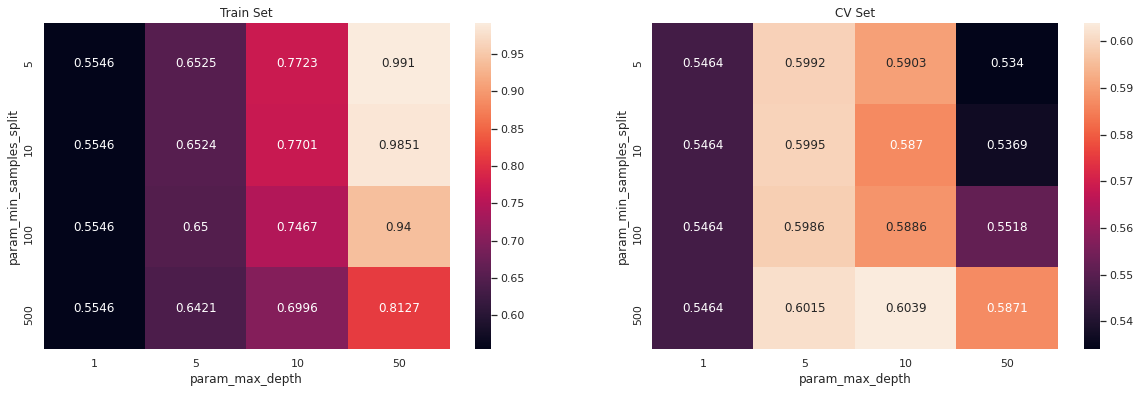

In [142]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(clf1.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()


In [143]:
print(clf1.best_estimator_)
#Mean cross-validated score of the best_estimator
print(clf1.score(X_tr ,y_train))
print(clf1.score(X_te ,y_test))


DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.709372632930352
0.6069372774073005


In [144]:
# Best tune parameters
best_tune_parameters=[{'max_depth': [5], 'min_samples_split':[50] } ]

## Finding Best AUC

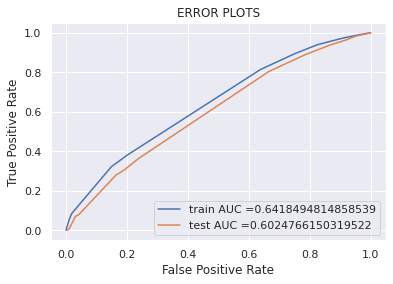

In [145]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
clf11= GridSearchCV( DecisionTreeClassifier(class_weight = 'balanced'),best_tune_parameters)
clfV1=DecisionTreeClassifier (class_weight = 'balanced',max_depth=10,min_samples_split=500)
clf11.fit(X_tr, y_train)
# for visulation
clfV1.fit(X_tr, y_train)
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred1 = clf11.predict_proba(X_tr) [:,1]
y_test_pred1 = clf11.predict_proba(X_te) [:,1]
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)
plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))


plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()



## Confusion Matrix

In [146]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),2) , "for threshold", np.round(t,2))
    predictions = []
    global predictions1 # make it global
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1= predictions
    return predictions


the maximum value of tpr*(1-fpr) 0.3 for threshold 0.53
the maximum value of tpr*(1-fpr) 0.28 for threshold 0.53


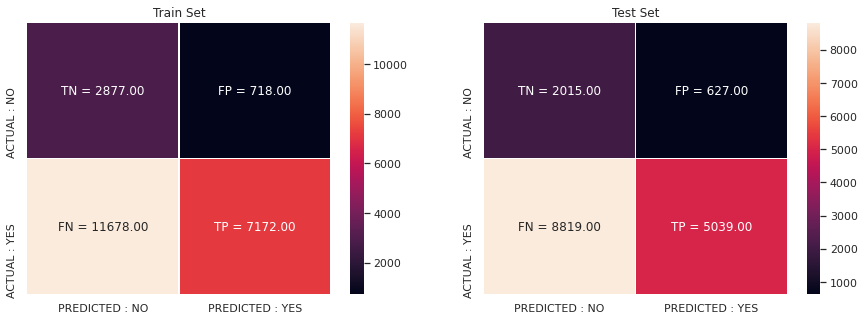

In [147]:
import seaborn as sns; 
sns.set()
con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_m_test.flatten())])).reshape(2,2)
sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()


## Plotting the WordCloud with the words of Essay

In [148]:
X_test['essay'].values[1]

'the music room place students free we 1 000 students privilege teach every one my students light day every time come music room we title 1 school one highest sped populations district many students come low income families impacts learning in music room strive share love music last lifetime our students love play instruments i believe students could make music anything get hands classroom ukuleles would provide students another musical outlet students would use instruments perform parents student body special events not learning music great way exercise brain also builds confidence i hope teaching students play instrument continue love music whole life these ukuleles help students grow young people musicians nannan'

In [149]:
fpi = []
for i in range(len(y_test)) :
  if (y_test[i] == 0) & (predictions1[i] == 1) :
   fpi.append(i)
fp_essay1 = []
for i in fpi :
  fp_essay1.append(X_test['essay'].values[i])


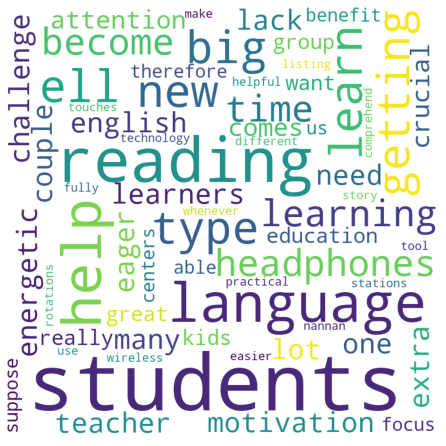

In [150]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay1:
  val = str(val)
  tokens = val.split()
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
for words in tokens :
  comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,
min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


## Plotting the Box with 'price' of the 'FP data points'

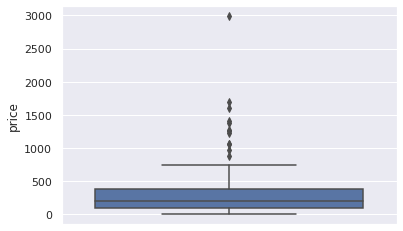

In [151]:
#Box Plot (FP 'price')
# first get the columns:
cols = X_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)
# get the data of the false pisitives
for i in fpi : # (in fpi all the false positives data points indexes)
  X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))
sns.boxplot(y='price', data=X_test_falsePos1)


## Plotting the pdf with 'teacher_number_of_previously_posted_projects' and 'FP data points'

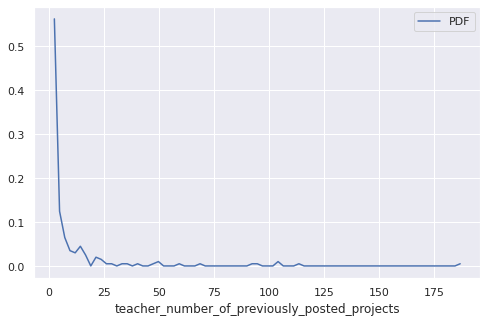

In [152]:
#PDF (FP ,teacher_number_of_previously_posted_projects)
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'],bins='auto', density=True)
pdf = counts/sum(counts)

pdfP, = plt.plot(bin_edges[1:], pdf)

plt.legend([pdfP], ["PDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()


# Vectorizing using TFIDF W2V 

In [153]:
from scipy.sparse import hstack
X_tr1 = hstack((X_train_essay_w2v, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_clean_ohe, X_train_clean_sub_ohe, X_train_price_norm, X_train_teacher_norm, X_train_positive_norm, X_train_negitive_norm, X_train_neutral_norm)).tocsr()
X_cr1 = hstack((X_cv_essay_w2v, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_clean_ohe, X_cv_clean_sub_ohe , X_cv_price_norm, X_cv_teacher_norm, X_cv_positive_norm, X_cv_negitive_norm, X_cv_neutral_norm)).tocsr()
X_te1 = hstack((X_test_essay_w2v, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_clean_ohe, X_test_clean_sub_ohe, X_test_price_norm, X_test_teacher_norm, X_test_positive_norm, X_test_negitive_norm, X_test_neutral_norm )).tocsr()

print("Final Data matrix")
print(X_tr1.shape, y_train.shape)
print(X_cr1.shape, y_cv.shape)
print(X_te1.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 404) (22445,)
(11055, 404) (11055,)
(16500, 404) (16500,)


## Hyper paramter tuning

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sea
DT = DecisionTreeClassifier()

parameters = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}

classifier = GridSearchCV(DT, parameters, cv=3, scoring='roc_auc')
classifier.fit(X_tr1, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 5, 10, 50],
                        

## Using Seaborn heat maps

In [57]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
clf1 = GridSearchCV(dt1, parameters, cv=3, scoring='roc_auc',return_train_score=True)
se1 = clf1.fit(X_tr1, y_train)


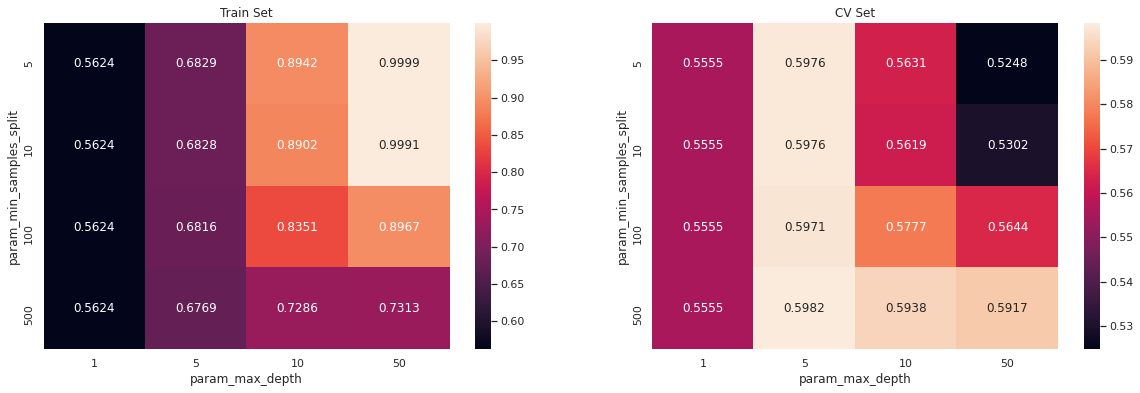

In [58]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(clf1.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [59]:
print(clf1.best_estimator_)
#Mean cross-validated score of the best_estimator
print(clf1.score(X_tr1 ,y_train))
print(clf1.score(X_te1 ,y_test))


DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.6588652748623014
0.5918187544936426


In [60]:
best_tune_parameters=[{'max_depth': [5], 'min_samples_split':[50] } ]

## Finding Best AUC

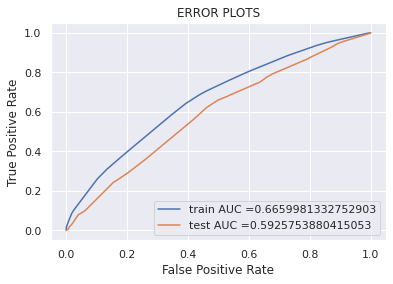

In [61]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
clf11= GridSearchCV( DecisionTreeClassifier(class_weight = 'balanced'),best_tune_parameters)
clfV1=DecisionTreeClassifier (class_weight = 'balanced',max_depth=10,min_samples_split=500)
clf11.fit(X_tr1, y_train)
# for visulation
clfV1.fit(X_tr1, y_train)
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred1 = clf11.predict_proba(X_tr1) [:,1]
y_test_pred1 = clf11.predict_proba(X_te1) [:,1]
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)
plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))


plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()


## Confusion Matrix

In [62]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),2) , "for threshold", np.round(t,2))
    predictions = []
    global predictions1 # make it global
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1= predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.39 for threshold 0.56
the maximum value of tpr*(1-fpr) 0.34 for threshold 0.56


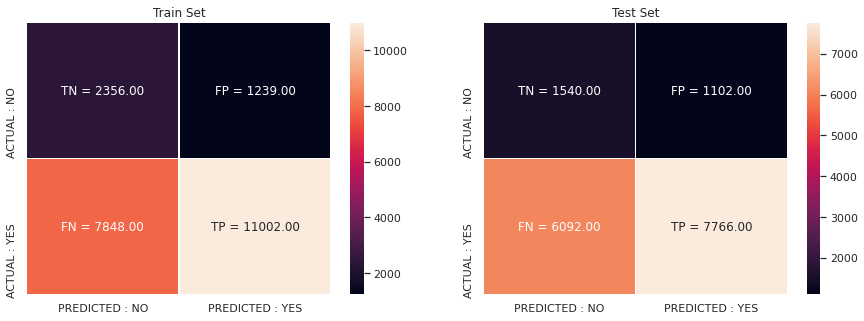

In [63]:
import seaborn as sns; 
sns.set()
con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_m_test.flatten())])).reshape(2,2)
sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

## Finding WordCloud

In [64]:
X_test['essay'].values[1]

'my students constantly completing hands activities project based learning students use technology scientific knowledge explore scientific concepts students constantly sharing results findings explorations using smart board the students active learners constantly searching answers asking questions they enjoy completing projects allow explore new concepts using innovative ideas they creative problem solvers need higher rigor environment order push beyond boundaries they need pushed state expectations learn discover things our school provides supportive environment unfortunately not funding technology initiatives therefore order provide technology stem education teachers must look different ways providing the ipad multipurpose tool 1 the ipad great tool use completing demonstrations class it collect data create graphical representation class analyze create conclusions it work nicely engage portion lesson cycle 2 it allow provide different formats presenting new information lecture settin

In [65]:
fpi = []
for i in range(len(y_test)) :
  if (y_test[i] == 0) & (predictions1[i] == 1) :
   fpi.append(i)
fp_essay1 = []
for i in fpi :
  fp_essay1.append(X_test['essay'].values[i])


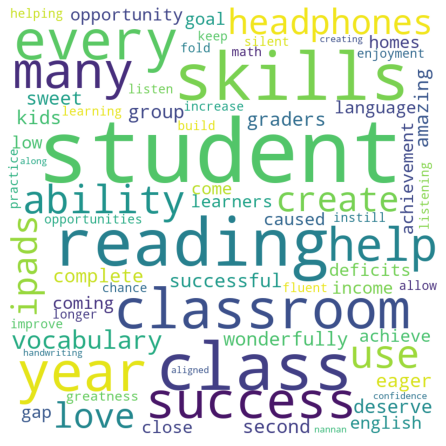

In [66]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay1:
  val = str(val)
  tokens = val.split()
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
for words in tokens :
  comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,
min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


## Box Plot

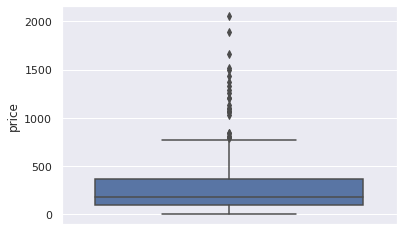

In [67]:
#Box Plot (FP 'price')
# first get the columns:
cols = X_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)
# get the data of the false pisitives
for i in fpi : # (in fpi all the false positives data points indexes)
  X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))
sns.boxplot(y='price', data=X_test_falsePos1)

## Finding PDF

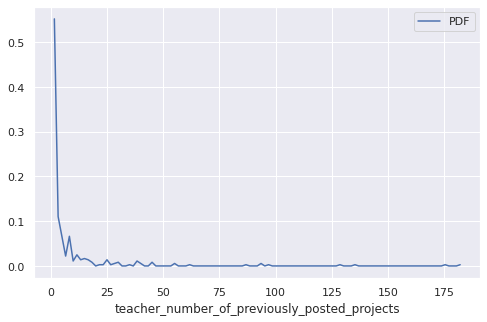

In [68]:
#PDF (FP ,teacher_number_of_previously_posted_projects)
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'],bins='auto', density=True)
pdf = counts/sum(counts)

pdfP, = plt.plot(bin_edges[1:], pdf)

plt.legend([pdfP], ["PDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()


## Using Important Features

In [92]:
from scipy.sparse import hstack
X_tr2 = hstack((X_train_essay_tfid, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_clean_ohe, X_train_clean_sub_ohe, X_train_price_norm, X_train_teacher_norm, X_train_positive_norm, X_train_negitive_norm, X_train_neutral_norm)).tocsr()
X_cr2= hstack((X_cv_essay_tfid, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_clean_ohe, X_cv_clean_sub_ohe , X_cv_price_norm, X_cv_teacher_norm, X_cv_positive_norm, X_cv_negitive_norm, X_cv_neutral_norm)).tocsr()
X_te2= hstack((X_test_essay_tfid, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_clean_ohe, X_test_clean_sub_ohe, X_test_price_norm, X_test_teacher_norm, X_test_positive_norm, X_test_negitive_norm, X_test_neutral_norm )).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 5100) (22445,)
(11055, 5100) (11055,)
(16500, 5100) (16500,)


In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
def selectKImportance(model, X, k=5):
     return X[:,model.best_estimator_.feature_importances_.argsort()[::-1][:k]]

In [94]:
X_set5_train = selectKImportance(clf1, X_tr2, 5000)
X_set5_test = selectKImportance(clf1, X_te2, 5000)

print(X_set5_train.shape)
print(X_set5_test.shape)

(22445, 400)
(16500, 400)


## Hyper paramter tuning

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sea
DT = DecisionTreeClassifier()

parameters = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}

classifier = GridSearchCV(DT, parameters, cv=3, scoring='roc_auc')
classifier.fit(X_tr2, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 5, 10, 50],
                        

## Using Seaborn heat maps

In [96]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt5= DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
clf5 = GridSearchCV(dt5, parameters, cv=3, scoring='roc_auc',return_train_score=True)
set5= clf5.fit(X_set5_train, y_train)

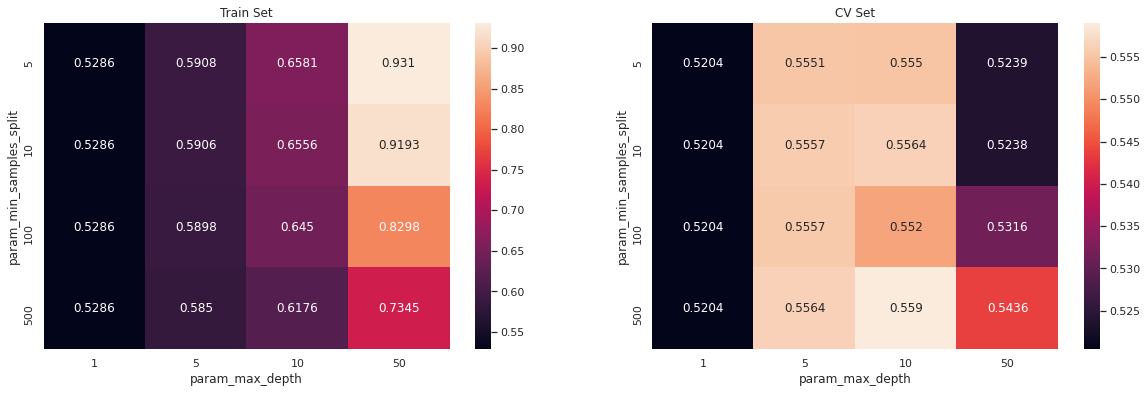

In [97]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(clf5.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [98]:
print(clf1.best_estimator_)
#Mean cross-validated score of the best_estimator
print(clf1.score(X_tr1 ,y_train))
print(clf1.score(X_te1 ,y_test))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.6588652748623014
0.5918187544936426


In [99]:
best_tune_parameters=[{'max_depth': [5], 'min_samples_split':[50] } ]

## Finding Best AUC

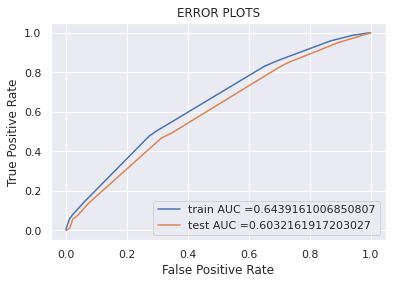

In [100]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
clf11= GridSearchCV( DecisionTreeClassifier(class_weight = 'balanced'),best_tune_parameters)
clfV1=DecisionTreeClassifier (class_weight = 'balanced',max_depth=10,min_samples_split=500)
clf11.fit(X_tr2, y_train)
# for visulation
clfV1.fit(X_tr2, y_train)
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred1 = clf11.predict_proba(X_tr2) [:,1]
y_test_pred1 = clf11.predict_proba(X_te2) [:,1]
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)
plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))


plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()


## Confusion Matrix

In [101]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),2) , "for threshold", np.round(t,2))
    predictions = []
    global predictions1 # make it global
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1= predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.35 for threshold 0.51
the maximum value of tpr*(1-fpr) 0.32 for threshold 0.51


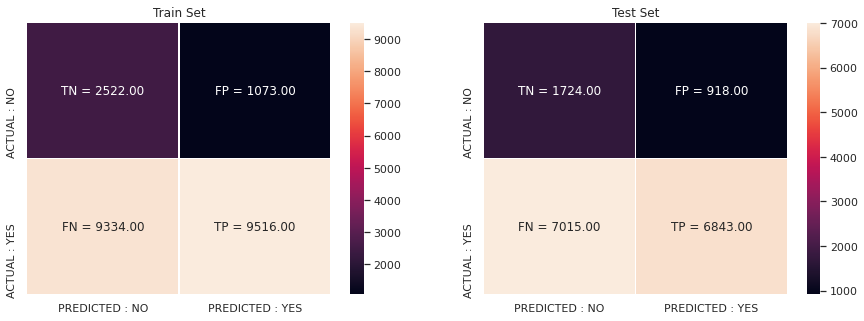

In [102]:
import seaborn as sns; 
sns.set()
con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_m_test.flatten())])).reshape(2,2)
sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

## Finding WordCloud

In [103]:
X_test['essay'].values[1]

'my students constantly completing hands activities project based learning students use technology scientific knowledge explore scientific concepts students constantly sharing results findings explorations using smart board the students active learners constantly searching answers asking questions they enjoy completing projects allow explore new concepts using innovative ideas they creative problem solvers need higher rigor environment order push beyond boundaries they need pushed state expectations learn discover things our school provides supportive environment unfortunately not funding technology initiatives therefore order provide technology stem education teachers must look different ways providing the ipad multipurpose tool 1 the ipad great tool use completing demonstrations class it collect data create graphical representation class analyze create conclusions it work nicely engage portion lesson cycle 2 it allow provide different formats presenting new information lecture settin

In [104]:
fpi = []
for i in range(len(y_test)) :
  if (y_test[i] == 0) & (predictions1[i] == 1) :
   fpi.append(i)
fp_essay1 = []
for i in fpi :
  fp_essay1.append(X_test['essay'].values[i])

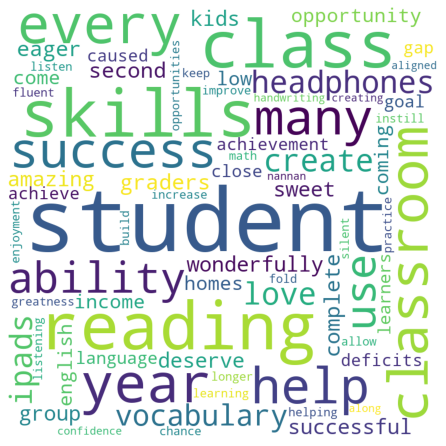

In [105]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay1:
  val = str(val)
  tokens = val.split()
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
for words in tokens :
  comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,
min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


## Box Plot

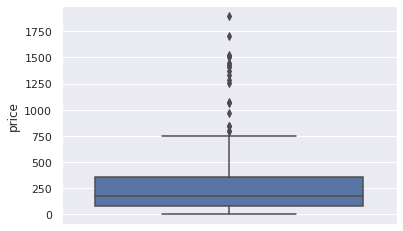

In [106]:
#Box Plot (FP 'price')
# first get the columns:
cols = X_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)
# get the data of the false pisitives
for i in fpi : # (in fpi all the false positives data points indexes)
  X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))
sns.boxplot(y='price', data=X_test_falsePos1)

## PDF

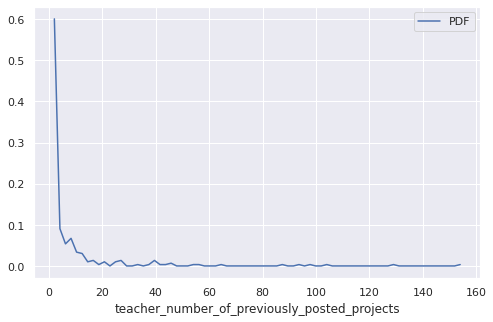

In [107]:
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'],bins='auto', density=True)
pdf = counts/sum(counts)

pdfP, = plt.plot(bin_edges[1:], pdf)

plt.legend([pdfP], ["PDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()


# SUMMARY



In [108]:
from prettytable import PrettyTable
tb = PrettyTable()
tb.field_names= (" Vectorizer ", " Max_depth ", " Min_sample_split "," Test -AUC ")
tb.add_row([" Tf - Idf", 5 , 50 ,0.60 ])

tb.add_row(["A VG - Tf - Idf", 5 , 50 ,0.59])
tb.add_row(["Top 5000 Features", 5, 50 , 0.60])
print(tb.get_string(titles = "Decision trees- Observations"))

+-------------------+-------------+--------------------+-------------+
|     Vectorizer    |  Max_depth  |  Min_sample_split  |  Test -AUC  |
+-------------------+-------------+--------------------+-------------+
|      Tf - Idf     |      5      |         50         |     0.6     |
|  A VG - Tf - Idf  |      5      |         50         |     0.59    |
| Top 5000 Features |      5      |         50         |     0.6     |
+-------------------+-------------+--------------------+-------------+
